In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

STUDENT PERFORMANCE ANALYSIS ON VARIOUS PARAMETERS

In [3]:
dataset=pd.read_csv('G:\Extras\Computer\Internship\StudentsPerformance.csv',encoding='ISO-8859-1')

In [4]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
Total                          1000 non-null int64
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [6]:
dataset.shape

(1000, 9)

In [7]:
dataset.describe()

,math score,reading score,writing score,Total
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [8]:
df=dataset.copy()

In [9]:
df.rename(columns={"parental level of education":"parental_level_of_education",
                  "test preparation course":"test_preparation_course",
                  "math score":"math_score",
                  "reading score":"reading_score",
                  "writing score":"writing_score"
                  
                 },inplace=True)

In [10]:
#makeing the copy more efficient
df['gender',]=df['gender'].astype('category')


In [11]:
df.info()
#65 kb is actualy good to work with we can categories other columns too if we want to make it more efficient

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental_level_of_education    1000 non-null object
lunch                          1000 non-null object
test_preparation_course        1000 non-null object
math_score                     1000 non-null int64
reading_score                  1000 non-null int64
writing_score                  1000 non-null int64
Total                          1000 non-null int64
(gender,)                      1000 non-null category
dtypes: category(1), int64(4), object(5)
memory usage: 71.5+ KB


In [12]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [13]:
df['parental_level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [14]:
df.nunique()

gender                           2
race/ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
Total                          194
(gender,)                        2
dtype: int64

In [15]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [16]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

DISTINCTION OF STUDENT PERFORMANCE BASED ON RACE

In [17]:
grouped=df.groupby(['race/ethnicity']).mean()

In [18]:
grouped

,math_score,reading_score,writing_score,Total
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,188.977528
group B,63.452632,67.352632,65.600000,196.405263
group C,64.463950,69.103448,67.827586,201.394984
group D,67.362595,70.030534,70.145038,207.538168
group E,73.821429,73.028571,71.407143,218.257143


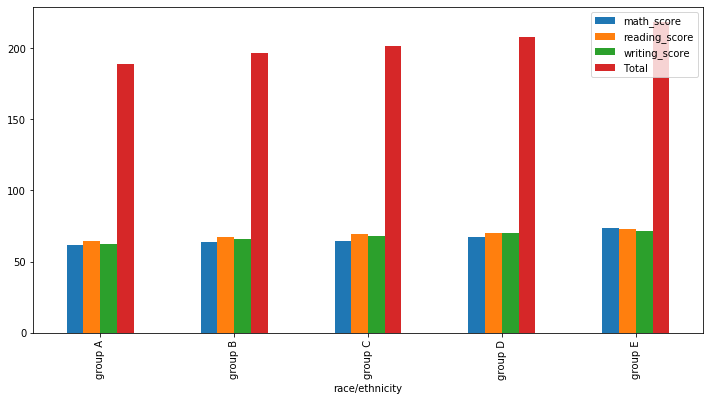

In [19]:
grouped.plot.bar(figsize=(12,6))

DISTINCTION OF STUDENT PERFORMANCE BASED ON PARENTAL LEVEL OF EDUCATION

In [20]:
grouped1=df.groupby(['parental_level_of_education']).mean()

In [21]:
grouped1

,math_score,reading_score,writing_score,Total
parental_level_of_education,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207
bachelor's degree,69.389831,73.000000,73.381356,215.771186
high school,62.137755,64.704082,62.448980,189.290816
master's degree,69.745763,75.372881,75.677966,220.796610
some college,67.128319,69.460177,68.840708,205.429204
some high school,63.497207,66.938547,64.888268,195.324022


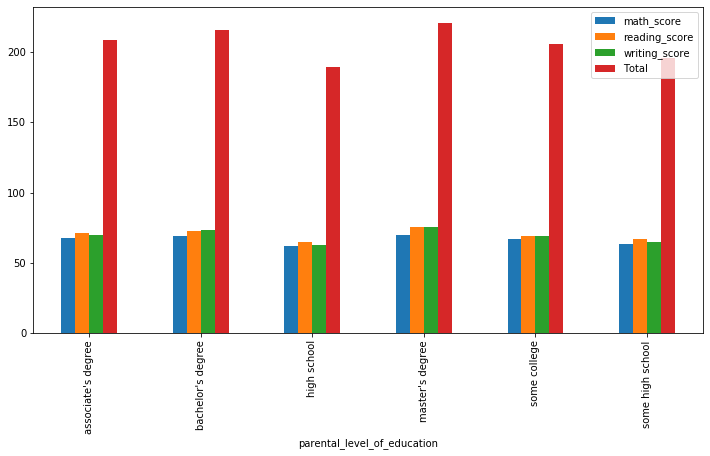

In [22]:
grouped1.plot.bar(figsize=(12,6))

DISTINCTION OF STUDENT PERFORMANCE BASED ON PREPARATION

In [23]:
grouped2=df.groupby(['test_preparation_course']).mean()

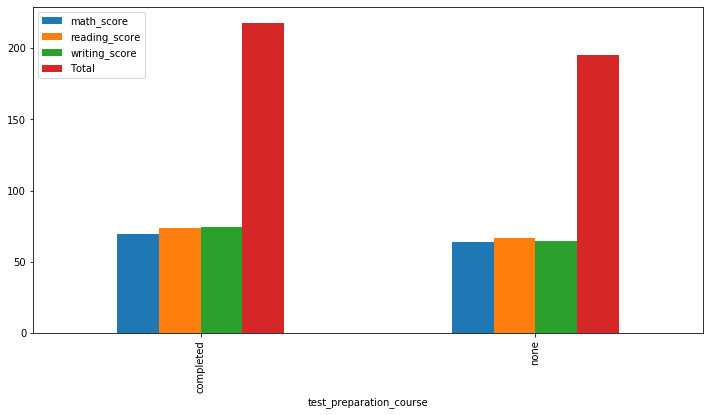

In [24]:
grouped2.plot.bar(figsize=(12,6))

DISTINCTION OF STUDENT PERFORMANCE BASED ON GENDER

In [25]:
grouped3=df.groupby(['gender']).mean()

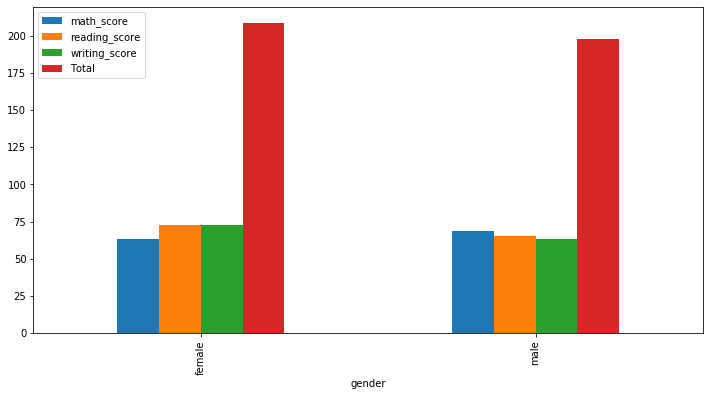

In [26]:
grouped3.plot.bar(figsize=(12,6))

In [27]:
#MODEL CREATION DETERMINING IF STUDENT WILL PERFORM GOOD OR BAD

In [28]:
df['test_preparation_course']=df['test_preparation_course'].map({'none':0,'completed':1})

In [29]:
df['race/ethnicity']=df['race/ethnicity'].map({'group A':0,'group B':1,'group C':2,'group D':3,'group E':4})

In [30]:
df['parental_level_of_education']=df['parental_level_of_education'].map({'high school':0,'some high school':1,
                                                                         
                                                                       'some college':2,"associate's degree":3,
                                                                        "bachelor's degree":4,"master's degree":5})

In [31]:
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,"(gender,)"
0,female,1,4,standard,0,72,72,74,218,female
1,female,2,2,standard,1,69,90,88,247,female
2,female,1,5,standard,0,90,95,93,278,female
3,male,0,3,free/reduced,0,47,57,44,148,male
4,male,2,2,standard,0,76,78,75,229,male
5,female,1,3,standard,0,71,83,78,232,female
6,female,1,2,standard,1,88,95,92,275,female
7,male,1,2,free/reduced,0,40,43,39,122,male
8,male,3,0,free/reduced,1,64,64,67,195,male
9,female,1,0,free/reduced,0,38,60,50,148,female


In [32]:
X=df.iloc[:,[1,2,4,5,6,7]].values

In [33]:
y=df.iloc[:,8].values

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [36]:
y_test=np.array(y_test)

In [37]:
y_train=np.array(y_train)

In [50]:
X_test.shape

(200, 6)

In [38]:
from sklearn.svm import SVR

In [39]:
regression=SVR(kernel='linear')

In [40]:
regression.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
y_pred=regression.predict(X_test)

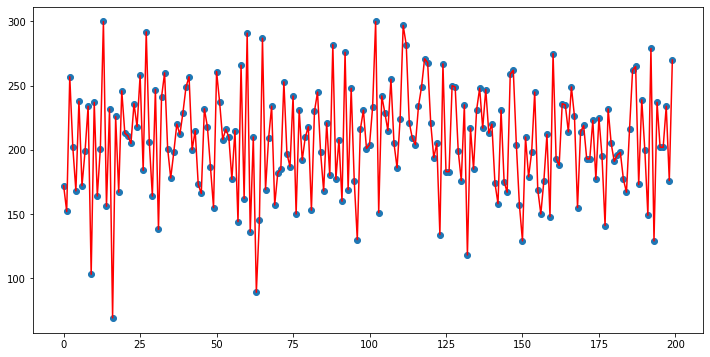

In [42]:
plt.figure(figsize=(12,6))
plt.scatter(np.arange(0,200),y_test)
plt.plot(np.arange(0,200),y_pred,color='red')